In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
idades = [35, 57, 56, 36, 30, 43, 41, 48, 40, 29, 41, 32, 49, 52, 24, 41, 38, 38, 28, 44, 41, 27, 40, 47, 37, 30, 49, 46, 30, 54, 29, 29, 55, 55, 36, 33, 46, 43, 46, 31, 36, 31, 47, 42, 60, 35, 33, 34, 37, 53]

In [3]:

n = len(idades)
min_v = min(idades)
max_v = max(idades)
amplitude_total = max_v - min_v


k = math.ceil(1 + 3.322 * math.log10(n))


h = math.ceil(amplitude_total / k)

bins = np.arange(min_v, max_v + h + 1, h)


df = pd.DataFrame(idades, columns=['Idade'])


df['Intervalo'] = pd.cut(df['Idade'], bins=bins, right=False)


tabela_freq = df['Intervalo'].value_counts().sort_index().reset_index()
tabela_freq.columns = ['Intervalo de Classe', 'fi']


tabela_freq['fr %'] = (tabela_freq['fi'] / n * 100).round(2)


tabela_freq['Fi'] = tabela_freq['fi'].cumsum()


print(f"Estatísticas: n={n}, Min={min_v}, Max={max_v}, k={k}, h={h}")
print("-" * 50)
print(tabela_freq.to_string(index=False))

Estatísticas: n=50, Min=24, Max=60, k=7, h=6
--------------------------------------------------
Intervalo de Classe  fi  fr %  Fi
           [24, 30)   6  12.0   6
           [30, 36)  11  22.0  17
           [36, 42)  13  26.0  30
           [42, 48)   9  18.0  39
           [48, 54)   5  10.0  44
           [54, 60)   5  10.0  49
           [60, 66)   1   2.0  50


In [4]:
print(type(tabela_freq))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(f"""

    Insights:
    
    Idades entre 24 -| 30 anos (24 até 29 anos), temos 6 pessoas, pelo qual representa 12% sobre o total das idades
    Idades entre 30 -| 36 anos (30 até 35 anos), temos 11 pessoas, que representa 22% sobre o total das idades
    Idades entre 36 -| 42 anos (36 até 41 anos), temos 13 pessoas, que representa 26% sobre o total das idades
    Idades entre 42 -| 48 anos (42 até 47 anos), temos 9 pessoas, que representa 18% sobre o total das idades
    Idades entre 48 -| 54 anos (48 até 53 anos), temos 5 pessoas, que representa 10% sobre o total das idades
    Idades entre 54 -| 60 anos (54 até 59 anos), temos 5 pessoas, que representa 10% sobre o total das idades
    Idades entre 60 -| 66 anos (60 até 65 anos), temos 1 pessoa, pelo qual representa 2% sobre o total das idades

    6 pessoas tem idade entre 24 a 30 anos
    17 pessoas tem idade entre 24 a 36 anos
    30 pessoas tem idade entre 24 a 42 anos
    39 pessoas tem idade entre 24 a 48 anos
    44 pessoas tem idade entre 24 a 54 anos
    49 pessoas tem idade entre 24 a 60 anos
    1 pessoa tem idade acima dos 60 anos e estritamente inferior a 66 anos
""")



    Insights:
    
    Idades entre 24 -| 30 anos (24 até 29 anos), temos 6 pessoas, pelo qual representa 12% sobre o total das idades
    Idades entre 30 -| 36 anos (30 até 35 anos), temos 11 pessoas, que representa 22% sobre o total das idades
    Idades entre 36 -| 42 anos (36 até 41 anos), temos 13 pessoas, que representa 26% sobre o total das idades
    Idades entre 42 -| 48 anos (42 até 47 anos), temos 9 pessoas, que representa 18% sobre o total das idades
    Idades entre 48 -| 54 anos (48 até 53 anos), temos 5 pessoas, que representa 10% sobre o total das idades
    Idades entre 54 -| 60 anos (54 até 59 anos), temos 5 pessoas, que representa 10% sobre o total das idades
    Idades entre 60 -| 66 anos (60 até 65 anos), temos 1 pessoa, pelo qual representa 2% sobre o total das idades

    6 pessoas tem idade entre 24 a 30 anos
    17 pessoas tem idade entre 24 a 36 anos
    30 pessoas tem idade entre 24 a 42 anos
    39 pessoas tem idade entre 24 a 48 anos
    44 pessoas tem id

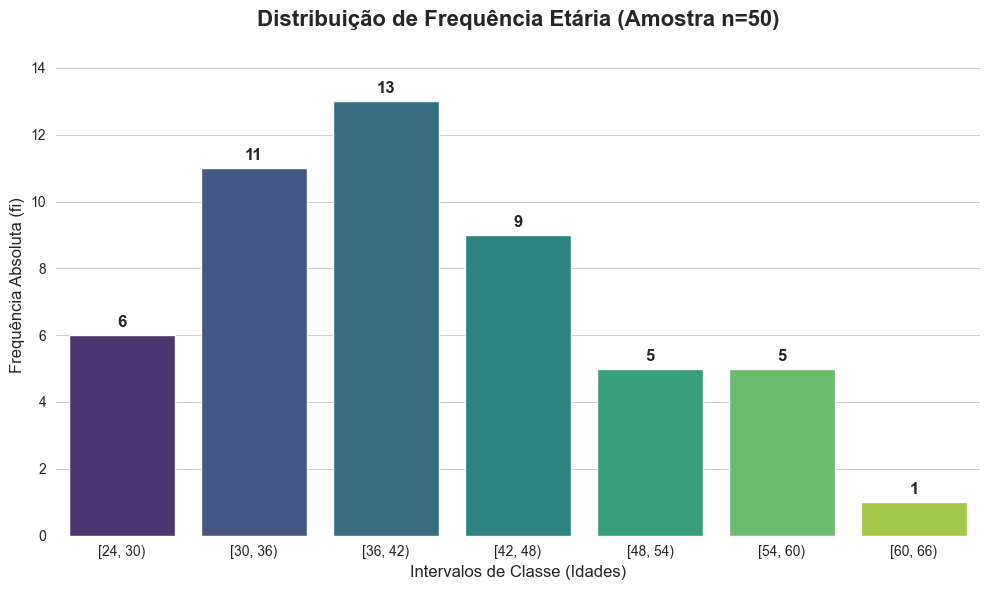

In [6]:

dados = {
    'Intervalo': tabela_freq['Intervalo de Classe'],
    'fi': tabela_freq.fi
}
df_plot = pd.DataFrame(dados)


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Intervalo', 
    y='fi', 
    data=df_plot, 
    hue='Intervalo',   
    palette='viridis', 
    legend=False       
)


for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontsize=12, fontweight='bold')


plt.title('Distribuição de Frequência Etária (Amostra n=50)', fontsize=16, fontweight='bold')
plt.xlabel('Intervalos de Classe (Idades)', fontsize=12)
plt.ylabel('Frequência Absoluta (fi)', fontsize=12)


plt.ylim(0, max(df_plot['fi']) + 2) 
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()